In [7]:
import os #cmd line library
#\\ is a windows thing, on linux paths are /
data_folder = "C:\Users\story645\Desktop\gcdrb_sessions\data"
print(data_folder)
data_path = os.path.join(data_folder, 'nyc_2005_2015.csv')
print(data_path)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-7-59e3b40fb889>, line 3)

In [8]:
import os #cmd line library
#fix unicode escape error by replacing \ with \\ 
#is a windows thing, on linux paths are /
data_folder = "C:\\Users\\story645\\Desktop\\gcdrb_sessions\\data"
print(data_folder)
data_path = os.path.join(data_folder, 'nyc_2005_2015.csv')
print(data_path)

C:\Users\story645\Desktop\gcdrb_sessions\data
C:\Users\story645\Desktop\gcdrb_sessions\data\nyc_2005_2015.csv


In [6]:
import pandas as pd
weather = pd.read_csv(data_path)

In [11]:
weather.head(2)

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
0,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050601,152,0,528,0,350,117,260,173,217
1,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050701,439,0,1324,0,333,161,283,205,244


In [17]:
print(weather['TSNW'].max())
print(weather['TSNW'].mean())

1023
-1833.0578461538462


In [18]:
weather['TSNW'].describe()

count    1625.000000
mean    -1833.057846
std      3928.840691
min     -9999.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1023.000000
Name: TSNW, dtype: float64

In [20]:
import numpy as np

In [21]:
1>2

False

In [23]:
b = np.array(([[1,2,3],[4,5,6],[7,8,9]]))
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [24]:
b>2 #boolean mask

array([[False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

In [25]:
b[b>2] # [ means subsetting->get out little piece of whole]

array([3, 4, 5, 6, 7, 8, 9])

In [28]:
b[b<4]

array([1, 2, 3])

In [51]:
b[b==2]

array([2])

In [36]:
weather=-9999.0

In [40]:
weather[weather==-9999.0]

TypeError: 'float' object is not subscriptable

In [41]:
weather = pd.read_csv(data_path)

In [43]:
weather.head(2)

,STATION_NAME,DATE,EMXP,MXSD,TPCP,TSNW,EMXT,EMNT,MMXT,MMNT,MNTM
0,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050601,152,0,528,0,350,117,260,173,217
1,NEW YORK J F KENNEDY INTERNATIONAL AIRPORT NY US,20050701,439,0,1324,0,333,161,283,205,244


In [46]:
import numpy as np
print(np.nan)

nan


In [47]:
weather[weather==-9999.00]= np.nan

In [ ]:
weather['TSNW'].tail()

In [52]:
weather_2 = weather.copy()

In [57]:
weather_2['TSNW'][weather_2['TSNW']==0] = 'NO SNOW'

In [59]:
weather_2['TSNW'][2:10:2]

2    NO SNOW
4    NO SNOW
6        127
8        427
Name: TSNW, dtype: object

In [60]:
weather['TSNW'].describe()

count    1320.000000
mean       53.769697
std       151.237483
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max      1023.000000
Name: TSNW, dtype: float64

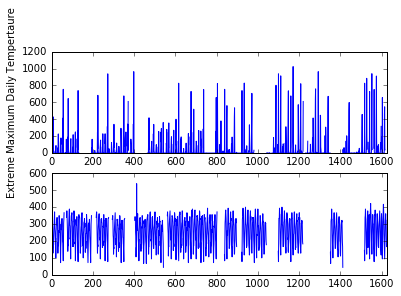

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2,1,1) #location of picture on grid
weather['TSNW'].plot(ax=ax)
ax.set_ylabel("Total Snowfall (inchs)")
ax2 = fig.add_subplot(2,1,2) #location of picture on grid
weather['EMXT'].plot(ax=ax2)
ax.set_ylabel("Extreme Maximum Daily Tempertaure")

In [79]:
weather[['TSNW', 'EMXT']].head()

,EMXT,TSNW
0,350,0
1,333,0
2,356,0
3,322,0
4,244,0


In [80]:
weather['TSNW', 'EMXT'].head()

KeyError: ('TSNW', 'EMXT')

In [81]:
weather[['TSNW', 'EMXT']].head()

,TSNW,EMXT
0,0,350
1,0,333
2,0,356
3,0,322
4,0,244


In [ ]:
fig = plt.figure()
weather[['TSNW', 'EMXT']]